## 02-Lab - XGBoost Classification

In this lab, you will work with the Heart dataset to predict if a person has AHD or not. More over, you will compare xgboost and all the other tree based algorithms that we have learned so far. In the second part of the lab, you will generate the label map for xgboost.

Data is availabe in : https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Heart.csv

"Some of the data in this lab are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " 

In [1]:
# Importing pandas
import pandas as pd

heart = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Heart.csv', na_values='?').dropna()
heart.info()
heart.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [2]:
# get dataset  
data_set = heart[["Age","MaxHR","AHD"]]

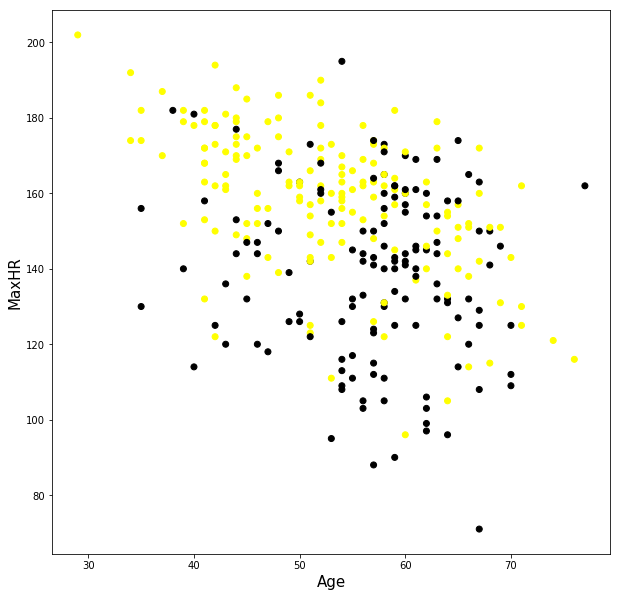

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.preprocessing import LabelEncoder


labels = LabelEncoder().fit_transform(data_set["AHD"].values) 
colors = ['yellow','black']
cmap= ListedColormap(colors)
plt.figure(figsize=(10,10))
plt.xlabel('Age', fontsize=15)
plt.ylabel('MaxHR', fontsize=15)
plt.scatter(data_set['Age'].values, data_set['MaxHR'].values, c=labels, cmap=cmap )


In [4]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split 

X = data_set[['Age','MaxHR']].values
y = labels.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print("y value min and max are : {},{}".format(min(y),max(y)))

y value min and max are : 0,1


## Part 1: Comparing all the classifiers 

In [5]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(max_depth=2, n_estimators=100, random_state=12)
xgb_pred= xgb_clf.fit(X_train,y_train).predict(X_test)
xgb_acc = metrics.accuracy_score(xgb_pred, y_test)
print("Accuracy of the xgboost classifier on the test set {}".format(xgb_acc))


Accuracy of the xgboost classifier on the test set 0.7


Accuracy of the xgboost classifier on the test set 0.7

XGBoost also has a random forest classifier. A good exercise is to compare all tree based classifiers- xgboost classifier, decision tree, boosted trees and random forest. We will be doing this below 

In [6]:
xrf_clf = xgb.XGBRFClassifier(max_depth=2, n_estimators=100, random_state=12)
xrf_pred= xrf_clf.fit(X_train,y_train).predict(X_test)
xrf_acc = metrics.accuracy_score(xrf_pred, y_test)
print("Accuracy of the xgboost Random forest classifier on the test set {}".format(round(xrf_acc,2)))


Accuracy of the xgboost Random forest classifier on the test set 0.77


In [7]:
# decision tree classifier. Make sure you name your variables apporpriately 
dt_clf = tree.DecisionTreeClassifier(random_state=12, max_depth=2)
dt_pred = dt_clf.fit(X_train, y_train.ravel()).predict(X_test)
dt_acc = metrics.accuracy_score(y_test, dt_pred)
print("Accuracy of the decision tree classifier on the test set {}".format(round(dt_acc,2)))

Accuracy of the decision tree classifier on the test set 0.73


Accuracy of the decision tree classifier on the test set 0.73

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=12)
rf_pred = rf_clf.fit(X_train, y_train.ravel()).predict(X_test)
rf_acc = metrics.accuracy_score(y_test, rf_pred)
print("Accuracy of the random forest classifier on the test set {}".format(round(rf_acc,2)))

Accuracy of the random forest classifier on the test set 0.77


Accuracy of the random forest classifier on the test set 0.73

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,
    max_depth=2, random_state=12).fit(X_train, y_train)
gb_pred = gb_clf.fit(X_train, y_train).predict(X_test)
gb_acc = metrics.accuracy_score(y_test, gb_pred)
print("Accuracy of the gradient boosting classifier on the test set {}".format(round(gb_acc,2)))

Accuracy of the gradient boosting classifier on the test set 0.73


Accuracy of the gradient boosting classifier on the test set 0.73


Ultimately you should be able to get-


| Tree method            | Accuracy |
|------------------------|----------|
| XGBoost(normal)        | 70%      |
| Decision tree          | 73%      |
| XGBoost(Random forest) | 77%      |
| Random Forest          | 77%      |
| Boosted trees          | 73%      |


From the above table it is evident that the Random Forest classifier does the best in either the regular or boosted form. A caveat is that we did not not carry out parameter tuning. We fixed the parameters such as max depth and number of estimators. In a real use case, one would have do gridsearchCV or parameter search and identify the best parameters to train the models. Hence the above table should be taken with a grain of salt since this is an poorly optimized comparison. What we can see is that the the biggest differences lie between Random Forest methods and non random forest methods. Random Forests are highly effective predictors in most scenarios. 

Next lets look generating the label map for XGboost.

## Part 2: Label map


In [10]:
def to_3d(x,y,plot_step=0.01): 
   

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    return xx, yy 

def plot_contour(xx,yy,Z): 
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    return cs

In [11]:

xx, yy = to_3d(X,y)

# we are going to generate the label map for xgb_classifier 
Z = xgb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10,10))
cmap= ListedColormap(colors)

_ = plot_contour(xx,yy, Z)
plt.scatter(data_set["Age"].values, data_set["MaxHR"].values, c=labels,cmap=cmap )
plt.show()

NameError: name 'np' is not defined

<img src="../../../images/xgb_label_map.png">